# Lab 2

## Task 1

\begin{equation}
y[n] + \frac{(D_1 + D_2)}{140} y[n-1] + \frac{(P_2 - D_2)}{130} y[n-2] 
- \frac{D_1}{150} y[n-4] - \frac{(M_1 - D_1)}{150} y[n-5] = 
\frac{M_1}{10} x[n] + \frac{(P_3 - D_2)}{20} x[n-1] - \frac{(M_2 - M_1)}{20} x[n-2] 
- \frac{P_4}{30} x[n-3] + \frac{D_2}{20} x[n-4] - \frac{M_2}{20} x[n-5]
\end{equation}


Date: 05/11/2003

\begin{equation}
D_1 = 0 \\\
D_2 = 5 \\\
M_1 = 1 \\\
M_2 = 1 \\\
P_1 = 2 \\\
P_2 = 0 \\\
P_3 = 0 \\\
P_4 = 3
\end{equation}

In [218]:
d1, d2 = 0, 5
m1, m2 = 1, 1
p1, p2, p3, p4 = 2, 0, 0, 3

a = [
    1,
    (d1 + d2) / 140,
    (p2 - d2) / 130,
    0,
    d1 / 150,
    (m1 - d1) / 150
]

b = [
    m1 / 10,
    (p3 - d2) / 20,
    (m2 - m1) / 20,
    p4 / 30,
    d2 / 20,
    m2 / 20
]

In [219]:
print(f"a: {a}")
print(f"b: {b}")

a: [1, 0.03571428571428571, -0.038461538461538464, 0, 0.0, 0.006666666666666667]
b: [0.1, -0.25, 0.0, 0.1, 0.25, 0.05]


## Task 2


In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, sosfilt

In [221]:
A = 1
freq = 10
sampling_freq = 256
T = 1
t = np.linspace(0, T, int(T * sampling_freq), endpoint=False)

x = A * np.sin(2 * np.pi * freq * t)

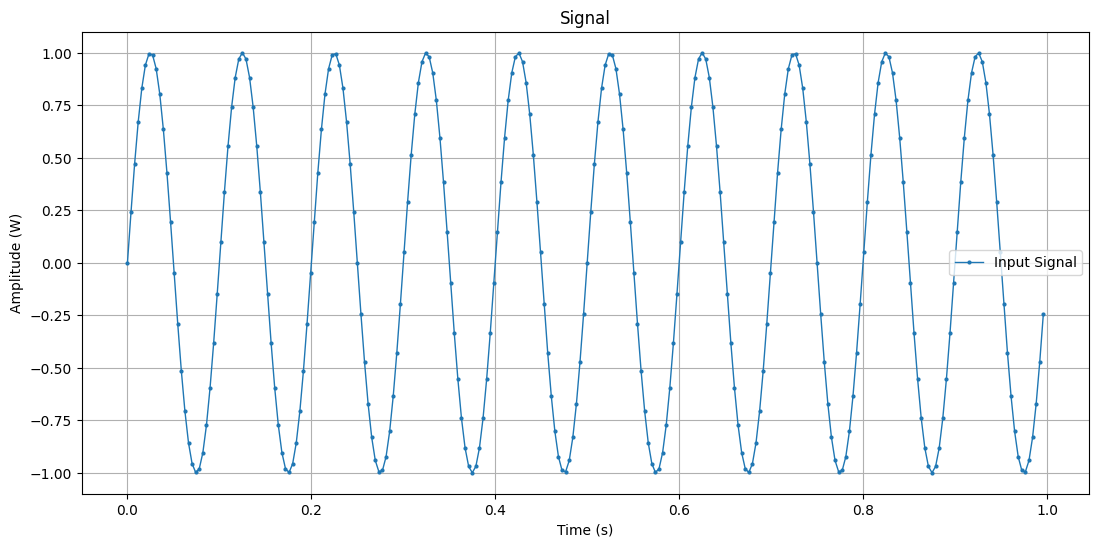

In [222]:
plt.figure(figsize=(13, 6))
plt.plot(t, x, '-o', markersize=2, label='Input Signal', linewidth=1)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (W)')
plt.grid(True)
plt.legend()
plt.show()

### 2.1

In [223]:
y_zero_initial_conditions = lfilter(b, a, x)

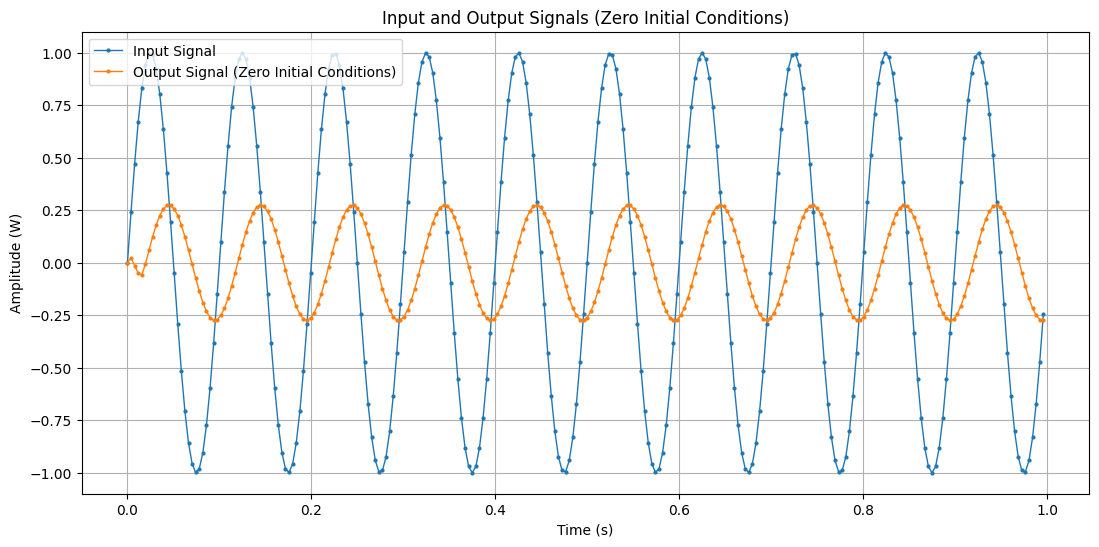

In [224]:
plt.figure(figsize=(13, 6))
plt.plot(t, x, '-o', markersize=2, label='Input Signal', linewidth=1)
plt.plot(t, y_zero_initial_conditions, '-o', markersize=2, label='Output Signal (Zero Initial Conditions)', linewidth=1)
plt.title('Input and Output Signals (Zero Initial Conditions)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (W)')
plt.grid(True)
plt.legend()
plt.show()

### 2.2

In [225]:
np.random.seed(0) 
initial_conditions = np.random.rand(max(len(a), len(b)) - 1)
y_random_initial_conditions = lfilter(b, a, x, zi=initial_conditions)

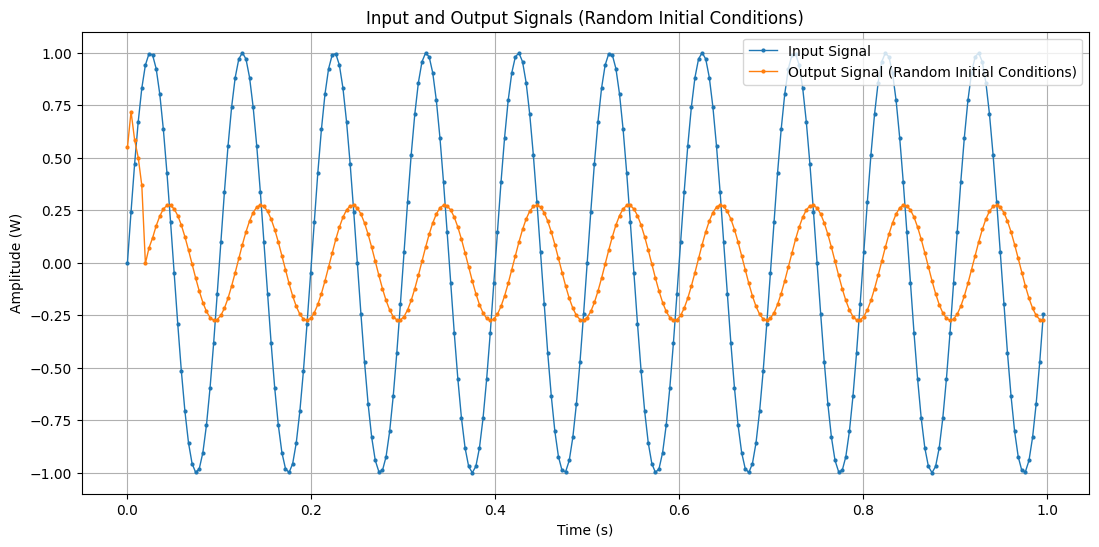

In [226]:
plt.figure(figsize=(13, 6))
plt.plot(t, x, '-o', markersize=2, label='Input Signal', linewidth=1)
plt.plot(t, y_random_initial_conditions[0], '-o', markersize=2, label='Output Signal (Random Initial Conditions)', linewidth=1)
plt.title('Input and Output Signals (Random Initial Conditions)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (W)')
plt.grid(True)
plt.legend()
plt.show()

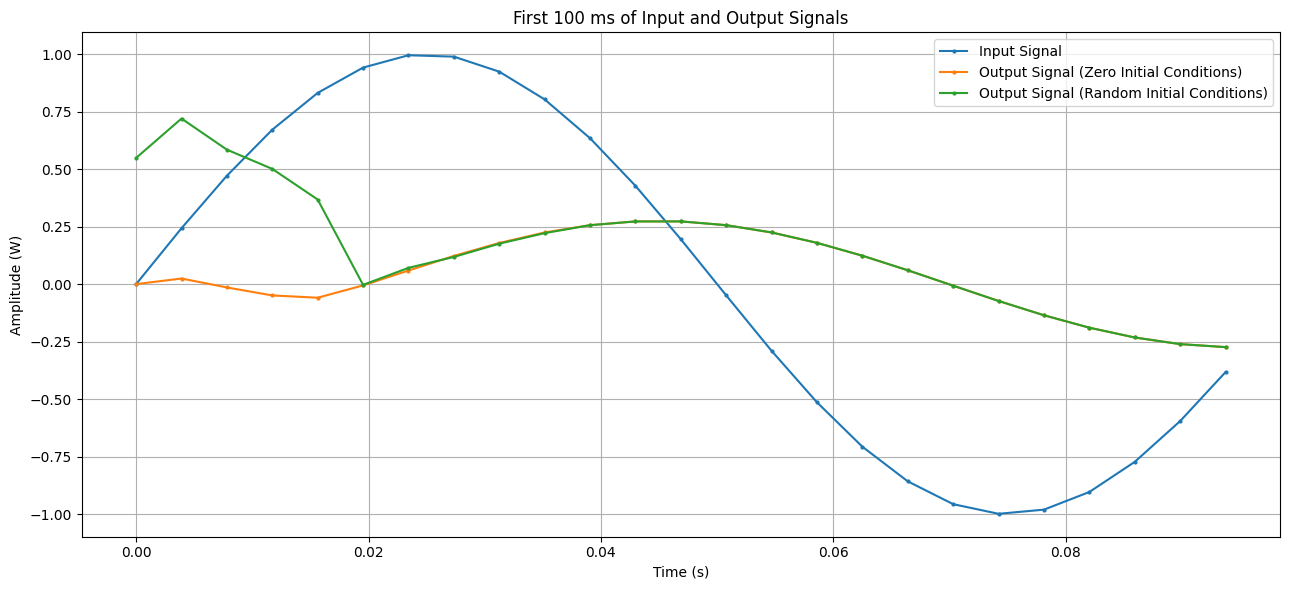

In [227]:
t_100ms = t[:int(0.1*sampling_freq)]

plt.figure(figsize=(13, 6))
plt.plot(t_100ms, x[:int(0.1*sampling_freq)], '-o', markersize=2, label='Input Signal')
plt.plot(t_100ms, y_zero_initial_conditions[:int(0.1*sampling_freq)], '-o', markersize=2, label='Output Signal (Zero Initial Conditions)')
plt.plot(t_100ms, y_random_initial_conditions[0][:int(0.1*sampling_freq)], '-o', markersize=2, label='Output Signal (Random Initial Conditions)')

plt.title('First 100 ms of Input and Output Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (W)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Conclusions:

* Output signal has similar sinusoidal form
* Output signal is shifted in phase compared to the input signal
* Output signal has a lower amplitude
* In the random initial conditions case, we see a short period of distortion at the beginning of the output signal.
* Overall, the output signal closely follows the input, with minimal loss in amplitude, which suggests filtering mainly affected the phase rather than significant attenuation of amplitude.

### 2.3

In [228]:
input_amplitude = np.max(np.abs(x))

output_amplitude_zero_ic = np.max(np.abs(y_zero_initial_conditions))
output_amplitude_random_ic = np.max(np.abs(y_random_initial_conditions[0]))

print(f"Input Signal Amplitude: {input_amplitude:.3f} V")
print(f"Output Signal Amplitude (Zero Initial Conditions): {output_amplitude_zero_ic:.3f} V")
print(f"Output Signal Amplitude (Random Initial Conditions): {output_amplitude_random_ic:.3f} V")

amplification_zero_ic = output_amplitude_zero_ic / input_amplitude
amplification_random_ic = output_amplitude_random_ic / input_amplitude

print(f"Amplification Factor (Zero Initial Conditions): {amplification_zero_ic:.3f}")
print(f"Amplification Factor (Random Initial Conditions): {amplification_random_ic:.3f}")

if amplification_zero_ic > 1:
    print("The system amplifies the signal at 10 Hz (Zero Initial Conditions).")
else:
    print("The system attenuates the signal at 10 Hz (Zero Initial Conditions).")

if amplification_random_ic > 1:
    print("The system amplifies the signal at 10 Hz (Random Initial Conditions).")
else:
    print("The system attenuates the signal at 10 Hz (Random Initial Conditions).")


Input Signal Amplitude: 1.000 V
Output Signal Amplitude (Zero Initial Conditions): 0.275 V
Output Signal Amplitude (Random Initial Conditions): 0.720 V
Amplification Factor (Zero Initial Conditions): 0.275
Amplification Factor (Random Initial Conditions): 0.720
The system attenuates the signal at 10 Hz (Zero Initial Conditions).
The system attenuates the signal at 10 Hz (Random Initial Conditions).


## Task 3


\begin{equation}
Gain = 20log_{10} (\frac{V_{out}}{V_{in}}) (dB)
\end{equation}

In [229]:
from scipy.signal import find_peaks

input_peaks, _ = find_peaks(x)
output_peaks, _ = find_peaks(y_zero_initial_conditions)

phase_difference_samples = t[input_peaks[1]]- t[output_peaks[1]]

magnitude_ratio = y_zero_initial_conditions[output_peaks[1]] / x[input_peaks[1]]

gain_dB = 20 * np.log10(abs(magnitude_ratio))

delta_phi_peaks = 2 * np.pi * freq * phase_difference_samples

print(f"Voltage Gain: {magnitude_ratio} db. Phase Difference: {delta_phi_peaks} radians")

Voltage Gain: 0.27268666027048577 db. Phase Difference: 5.154175447295755 radians


## Task 4

In [230]:
frequencies = [1, 20, 50, 75, 100, 125, 150]  # in Hz

t = np.arange(0, 1, 1/sampling_freq)  # 1 second duration

# coefficient results
transfer_coefficients = []

In [231]:
for f in frequencies:
    # Generating input signal (amplitude 1 V)
    x = np.sin(2 * np.pi * f * t)
    
    # System response
    y = lfilter(b, a, x)
    
    # Calculating the amplitude of the output signal
    # We'll ignore the initial transient by taking the last 50% of the signal
    steady_state_range = int(len(y) * 0.5)
    output_amplitude = np.max(np.abs(y[steady_state_range:]))
    
    # Input amplitude is 1 V
    input_amplitude = 1.0  # Since sinusoids have amplitude 1 V
    
    transfer_coefficient = output_amplitude / input_amplitude
    
    transfer_coefficients.append(transfer_coefficient)


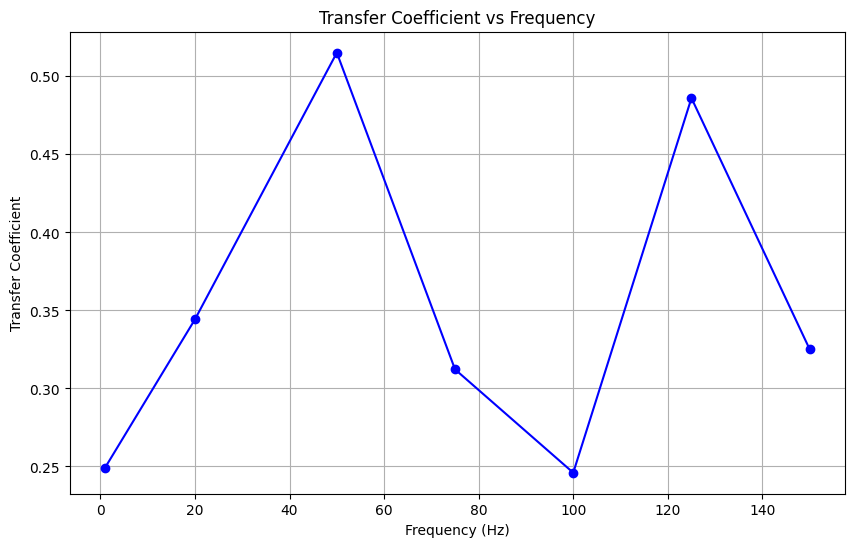

In [232]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies, transfer_coefficients, 'o-', color='blue')
plt.title('Transfer Coefficient vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transfer Coefficient')
plt.grid(True)
plt.show()

## Task 5

In [233]:
f1 = 3 
f2 = 20 

x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * f2 * t)

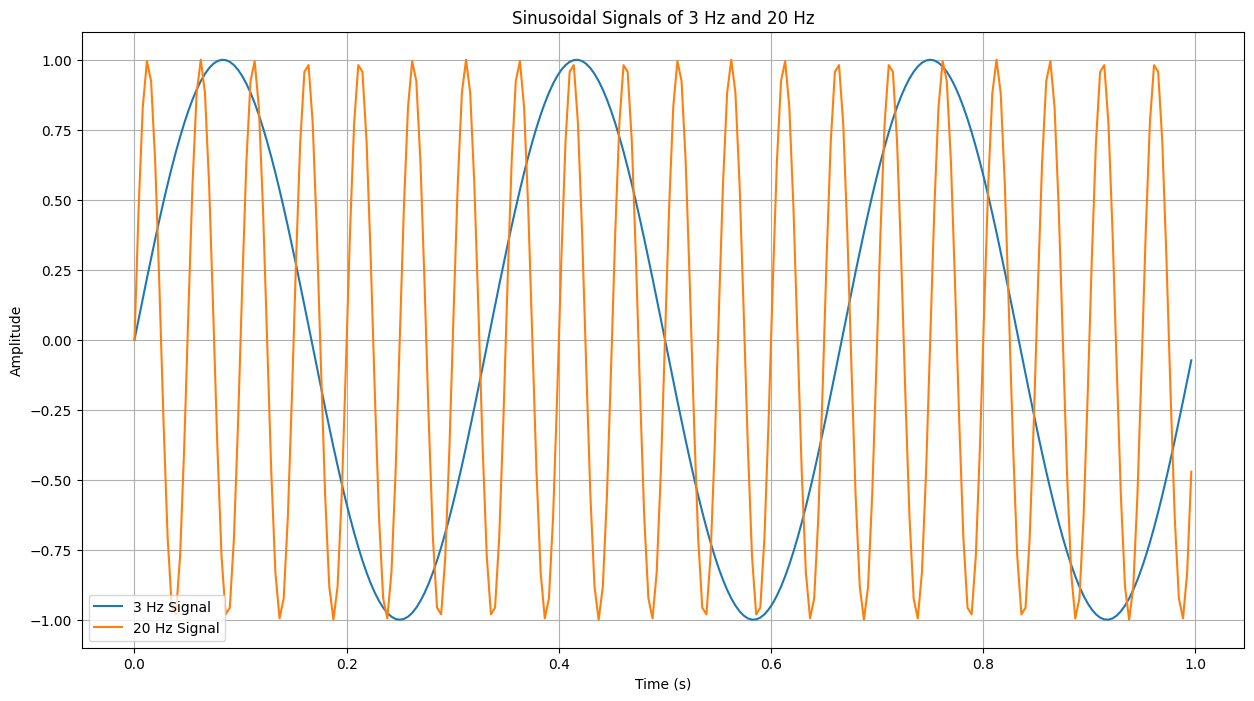

In [234]:
plt.figure(figsize=(15, 8))
plt.plot(t, x1, label='3 Hz Signal')
plt.plot(t, x2, label='20 Hz Signal')
plt.title('Sinusoidal Signals of 3 Hz and 20 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

In [235]:
y1 = lfilter(b, a, x1)
y2 = lfilter(b, a, x2)
y_sum = lfilter(b, a, x1 + x2)

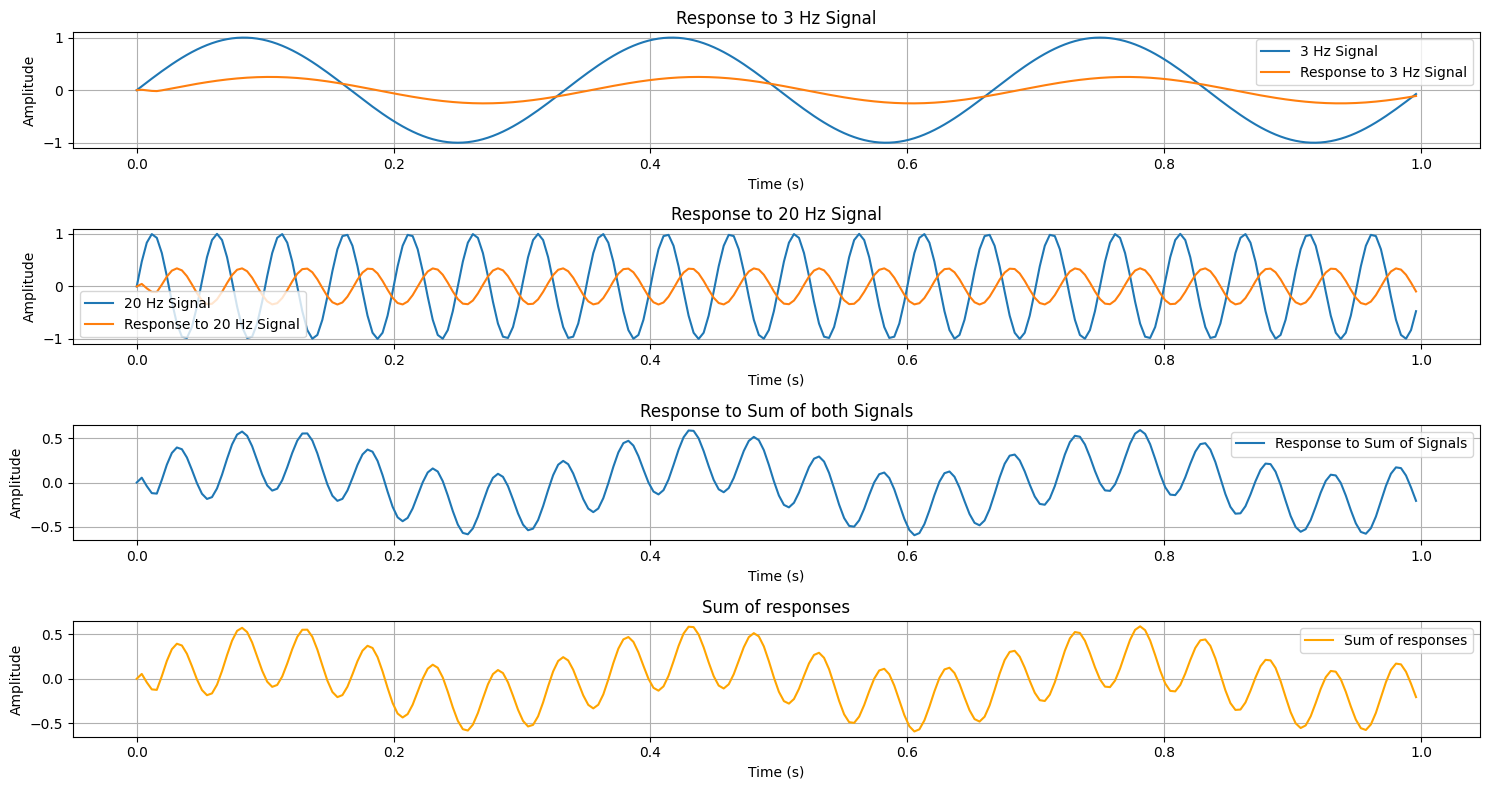

In [236]:
plt.figure(figsize=(15, 8))

plt.subplot(4, 1, 1)
plt.plot(t, x1, label='3 Hz Signal')
plt.plot(t, y1, label='Response to 3 Hz Signal')
plt.title('Response to 3 Hz Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, x2, label='20 Hz Signal')
plt.plot(t, y2, label='Response to 20 Hz Signal')
plt.title('Response to 20 Hz Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
# plt.plot(t, x1 + x2, label='Sum of Signals')
plt.plot(t, y_sum, label='Response to Sum of Signals')
plt.title('Response to Sum of both Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, y1 + y2, label='Sum of responses',color='orange')
# plt.ylim(-2, 2)
plt.title('Sum of responses')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [237]:
np.all(np.isclose(y_sum, y1 + y2, rtol = 10**-8))

np.True_

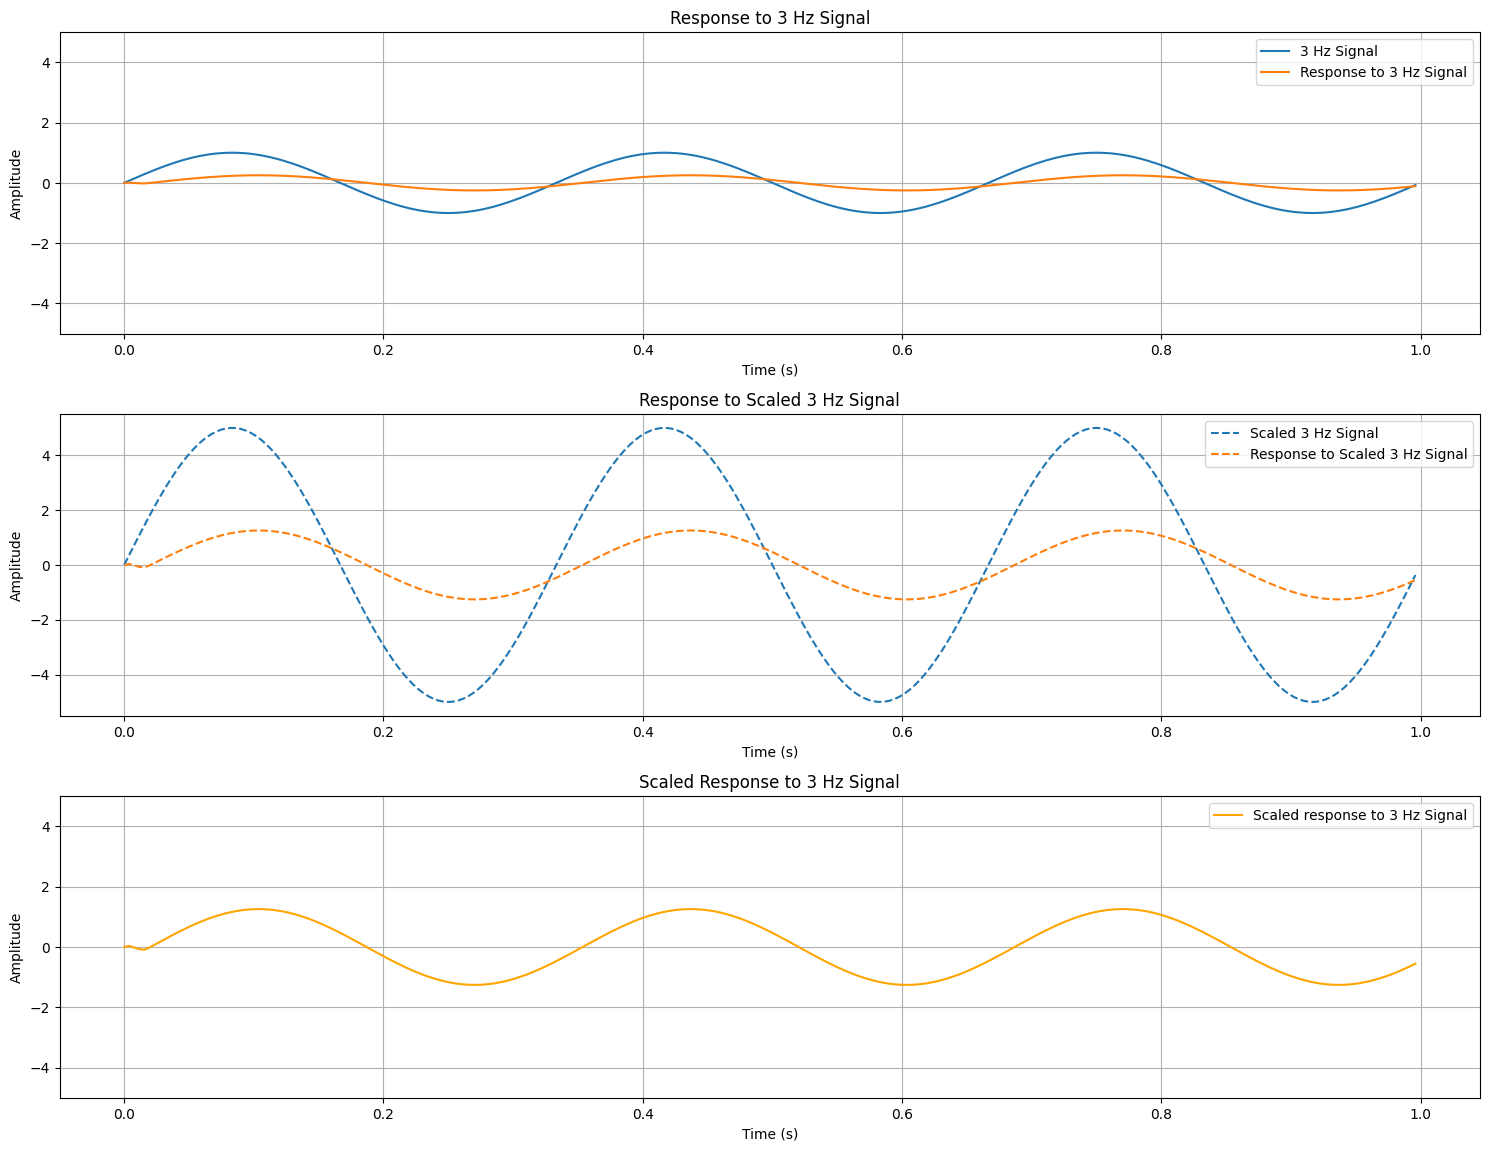

In [238]:
scaled_x1 = 5 * x1
scaled_y1 = lfilter(b, a, scaled_x1)


plt.figure(figsize=(15, 15))

plt.subplot(4, 1, 1)
plt.plot(t, x1, label='3 Hz Signal')
plt.plot(t, y1, label='Response to 3 Hz Signal')
plt.ylim(-5, 5)
plt.title('Response to 3 Hz Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, scaled_x1, '--', label='Scaled 3 Hz Signal')
plt.plot(t, scaled_y1, '--', label='Response to Scaled 3 Hz Signal')
plt.title('Response to Scaled 3 Hz Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()


plt.subplot(4, 1, 3)
plt.plot(t, 5 * y1,  label="Scaled response to 3 Hz Signal", color='orange')
plt.ylim(-5, 5)
plt.title('Scaled Response to 3 Hz Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [239]:
np.all(np.isclose(scaled_y1, 5 * y1, rtol = 10**-8))

np.True_

## Task 6

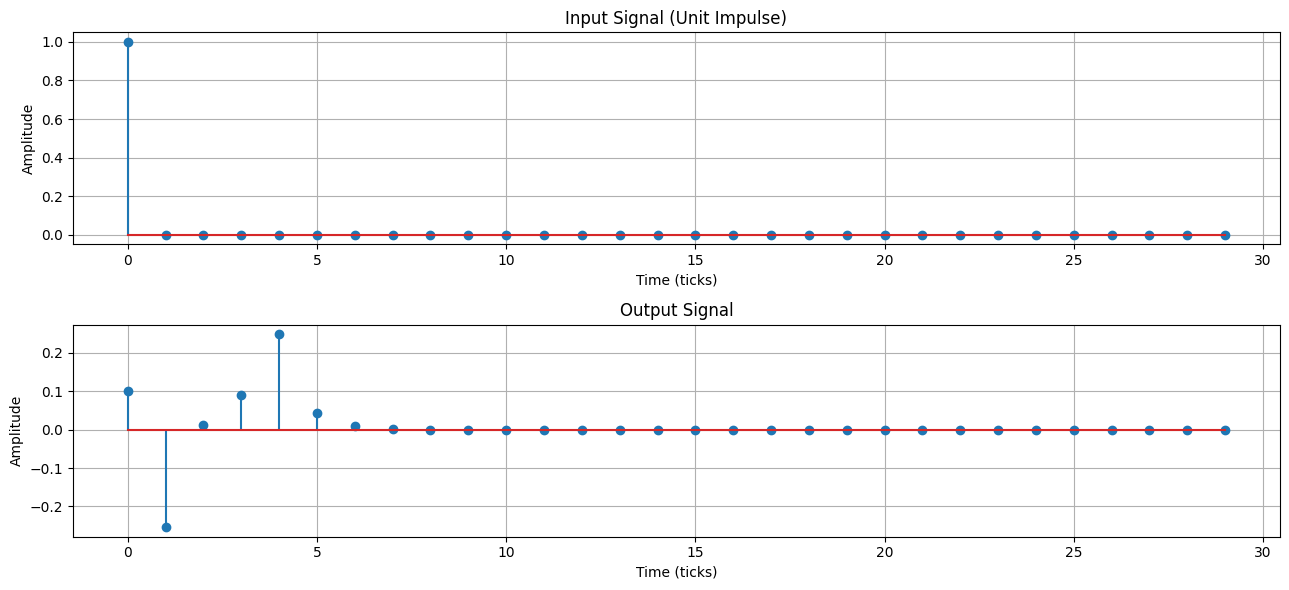

In [240]:
from scipy.signal import unit_impulse

impulse_signal = unit_impulse(30)

impulse_response = lfilter(b, a, impulse_signal)

plt.figure(figsize=(13, 6))

plt.subplot(2, 1, 1)
plt.stem(impulse_signal)
plt.title('Input Signal (Unit Impulse)')
plt.xlabel('Time (ticks)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(impulse_response)
plt.title('Output Signal')
plt.xlabel('Time (ticks)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

## Task 7

In [241]:
from scipy.signal import TransferFunction, dimpulse

## Task 8

In [242]:
from scipy.signal import convolve

A = 1 
f = 10  # Frequency 
fs = 256  # Sampling frequency
T = 1  
t = np.linspace(0, T, int(T*fs), endpoint=False)
x = A * np.sin(2 * np.pi * f * t)

In [243]:
system = TransferFunction(b, a, dt=1/fs)

t_impulse, y_impulse = dimpulse(system, n=len(x))

y_impulse = y_impulse[0].flatten()

output_convolve = convolve(x, y_impulse, method="direct")[:len(t)]

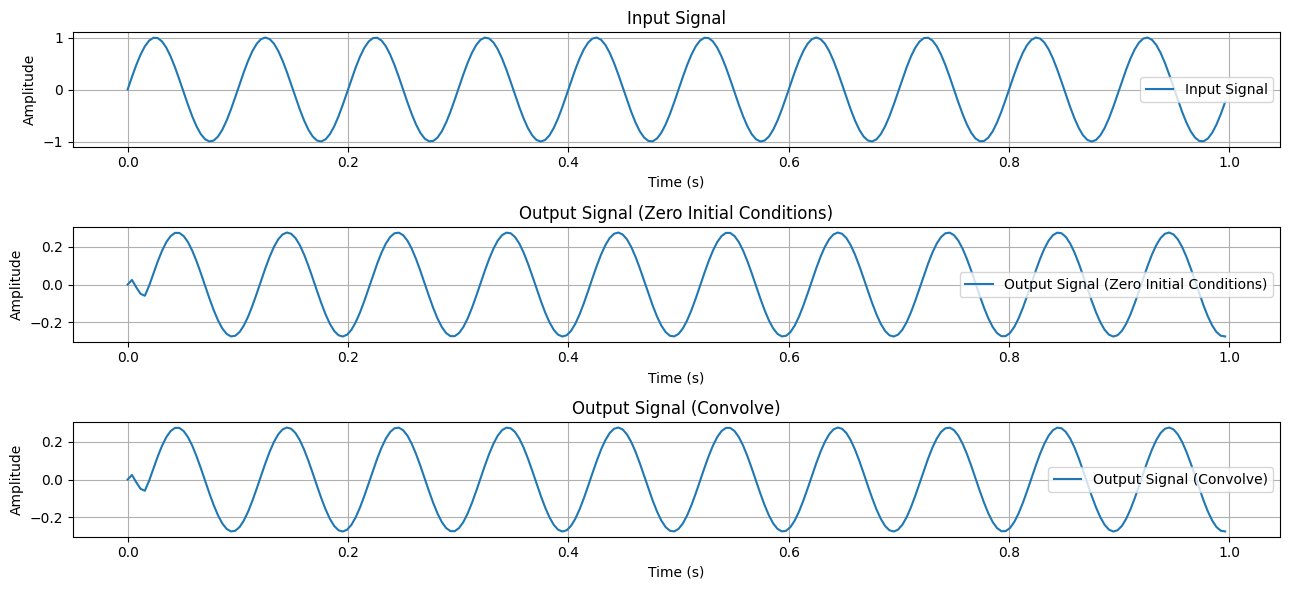

In [244]:
plt.figure(figsize=(13, 6))

plt.subplot(3, 1, 1)
plt.plot(t, x, label='Input Signal')
plt.title('Input Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, y_zero_initial_conditions, label='Output Signal (Zero Initial Conditions)')
plt.title('Output Signal (Zero Initial Conditions)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, output_convolve, label='Output Signal (Convolve)')
plt.title('Output Signal (Convolve)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [245]:
np.all(np.isclose(output_convolve, y_zero_initial_conditions, rtol=10**-5))

np.True_

As we can see, the convolution of impulse response with input signal gives the same results as filter from task 2.1. 

For linear system convolution of the system's response with input signal is equivalent to filtering the input signal using the system itself.

## Task 9

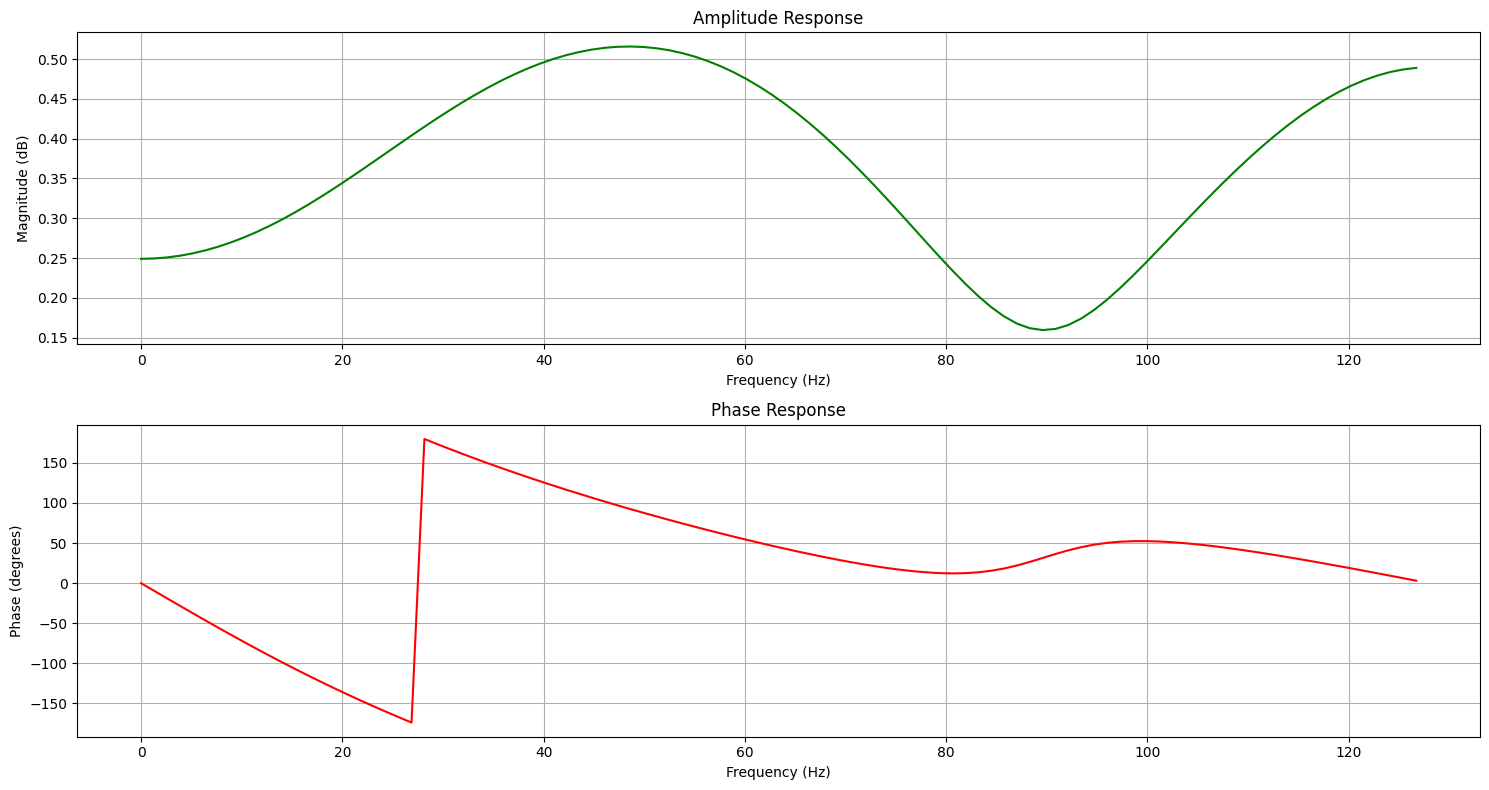

In [246]:
from scipy.signal import freqz

w, h = freqz(b, a, worN=100, fs = fs)

amplitude_response = abs(h)
phase_response = np.angle(h, deg=True)

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(w, amplitude_response, 'g')
plt.title('Amplitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w, phase_response, 'r')
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.tight_layout()
plt.show()

### 9.1

In [247]:
# Converting frequencies to normalized frequencies (radians/sample),
# since freqz by default uses normalized frequencies from [0 to pi] radians/sample
normalized_frequencies = [f / fs * np.pi * 2 for f in frequencies]  # Multiply by 2 because freqz accepts [0, pi]

# Use freqz to compute the frequency response at specified frequencies
w, h = freqz(b, a, worN=normalized_frequencies)

# Calculate amplitude response
amplitude_response = np.abs(h)

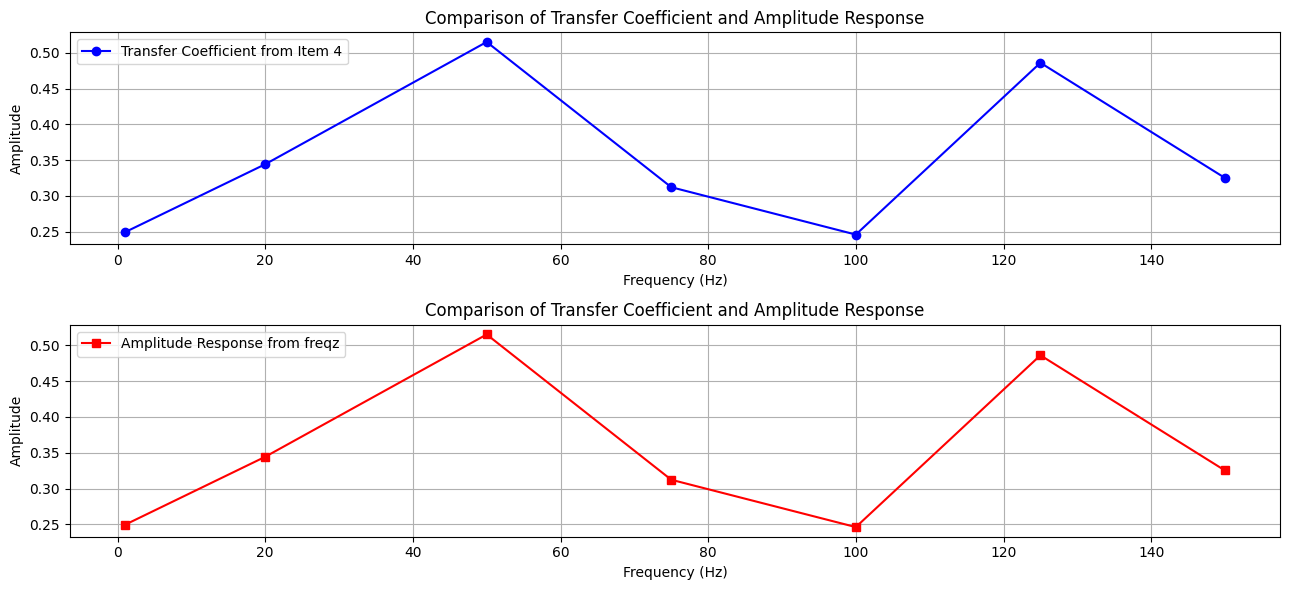

In [248]:
# Plot comparison
plt.figure(figsize=(13, 6))

plt.subplot(2, 1, 1)
plt.plot(frequencies, transfer_coefficients, 'o-', label='Transfer Coefficient from Item 4', color='blue')
plt.title('Comparison of Transfer Coefficient and Amplitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(frequencies, amplitude_response, 's-', label='Amplitude Response from freqz', color='red')
plt.title('Comparison of Transfer Coefficient and Amplitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

We can see, that the graphs are identical! The identical graphs indicate that the system’s response has been modeled correctly. Both the empirical method (in item 4) and the analytical method (in item 9.1 using freqz) provide the same results, which validates the system's frequency-dependent behavior.

### 9.2

In [249]:
# Converting the amplitude response to decibels
amplitude_response_db = 20 * np.log10(amplitude_response)

# Finding frequencies where amplitude response is greater than 0 dB (gain > 1)
amplifying_indices = np.where(amplitude_response > 1)[0]
amplifying_frequencies = np.array(frequencies)[amplifying_indices]

if len(amplifying_frequencies) > 0:
    print("The system amplifies the signal at the following frequencies (Hz):")
    for freq in amplifying_frequencies:
        print(f"- {freq} Hz")
else:
    print("The system does not amplify the signal at ANY of the tested frequencies.")


The system does not amplify the signal at any of the tested frequencies.


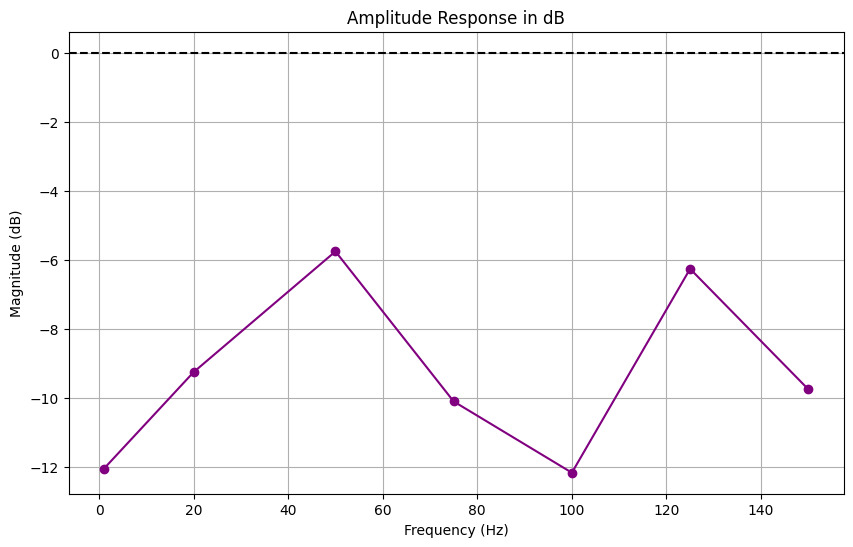

In [250]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies, amplitude_response_db, 'o-', color='purple')
plt.title('Amplitude Response in dB')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.axhline(0, color='k', linestyle='--')  # Line at 0 dB
plt.grid(True)
plt.show()


## Task 10

In [251]:
from scipy.signal import square

In [252]:
duty_cycle = 0.30
input_signal = square(2 * np.pi * 5 * t, duty=duty_cycle)  # Frequency 5 Hz, 30% duty cycle

output_signal = lfilter(b, a, input_signal)

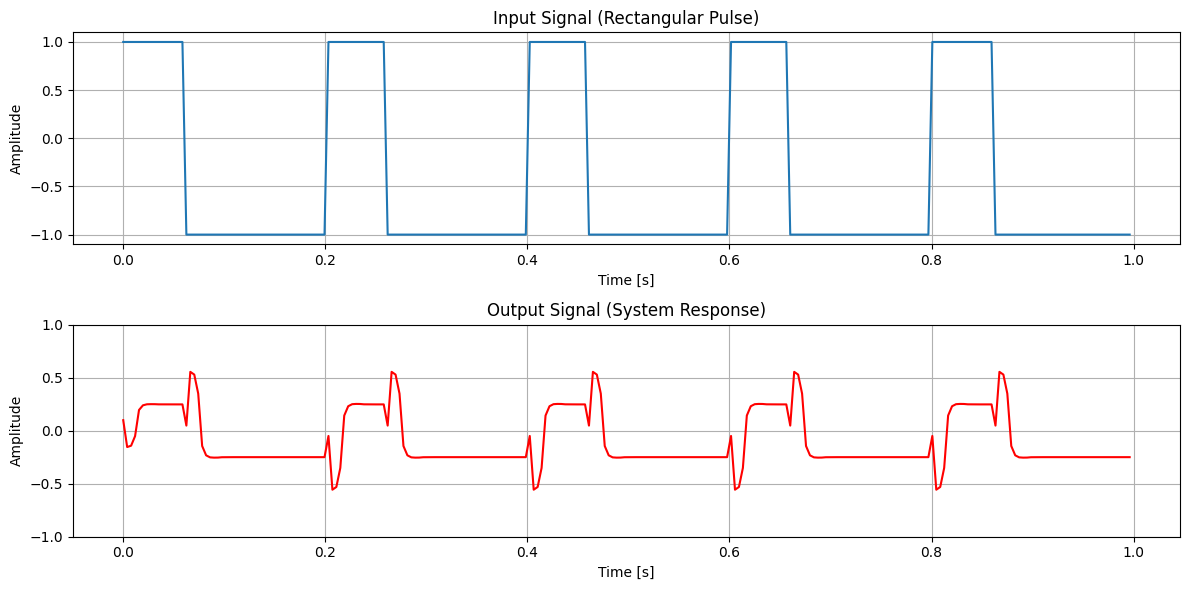

In [253]:
# Plot input and output signals
plt.figure(figsize=(12, 6))

# input
plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label='Input Signal (Rectangular Pulse)')
plt.title('Input Signal (Rectangular Pulse)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# output
plt.subplot(2, 1, 2)
plt.plot(t, output_signal, label='Output Signal (System Response)', color='r')
plt.title('Output Signal (System Response)')
plt.ylim(-1, 1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


The output signal is clearly distorted relative to the input. The distortion is characterized by:
Loss of the sharp transitions in the rectangular pulse.
Damped oscillations after each transition.